In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import collections
import seaborn as sns

In [3]:
_2008 = pd.read_csv('2008.csv')
_2009 = pd.read_csv('2009.csv')
_2010 = pd.read_csv('2010.csv')
_2011 = pd.read_csv('2011.csv')
_2012 = pd.read_csv('2012.csv')
_2013 = pd.read_csv('2013.csv')
_2014 = pd.read_csv('2014.csv')
_2015 = pd.read_csv('2015.csv')
_2016 = pd.read_csv('2016.csv')
_2017 = pd.read_csv('2017.csv')
_2018 = pd.read_csv('2018.csv')
_2019 = pd.read_csv('2019.csv')
_2020_2021 = pd.read_csv('2020-2021.csv')

In [7]:
data = _2008.append(_2009).append(_2010).append(_2011).append(_2012).append(_2013).append(_2014).append(_2015).append(_2016).append(_2017).append(_2018).append(_2019).append(_2020_2021)

In [8]:
data.to_csv('pitch_data_2008_2021')

In [11]:
pd.read_csv('pitch_data_2008_2021')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,24,44,88,89,93) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,3
0,0,CH,9/30/08,82.9,-0.16,5.70,"Danks, John",346857,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,0.042,NaN
1,1,FF,9/30/08,92.3,0.07,5.87,"Danks, John",346857,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,-0.049,NaN
2,2,FF,9/30/08,91.6,0.11,5.72,"Danks, John",430593,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,-0.047,NaN
3,3,FF,9/30/08,91.8,0.24,5.80,"Danks, John",430593,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,-0.040,NaN
4,4,FF,9/30/08,91.1,0.26,5.85,"Danks, John",430593,433579,NaN,...,0,1,0,1,NaN,NaN,NaN,0.000,0.045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519995,39995,NaN,4/15/21,93.1,1.68,6.25,"Urías, Julio",658069,628711,NaN,...,1,0,1,0,Infield shift,Standard,146.0,0.000,0.041,FF
519996,39996,NaN,4/15/21,93.5,-1.27,6.29,"Newberry, Jake",642133,623470,NaN,...,2,7,2,7,Infield shift,Standard,199.0,0.000,0.056,FF
519997,39997,NaN,4/15/21,81.2,1.30,6.21,"Avilán, Luis",452678,501593,NaN,...,10,4,10,4,Standard,Standard,129.0,0.000,0.023,CH
519998,39998,NaN,4/15/21,87.3,2.92,5.68,"Kay, Anthony",467793,641743,NaN,...,0,1,1,0,Standard,Standard,127.0,-0.049,-0.041,CH


In [47]:
pitch_data = data[['pitch_type', 'plate_x', 'plate_z', 'description']]

In [48]:
pitch_data = pitch_data[pitch_data['description'].isin(['called_strike', 'ball', 'blocked_ball'])]

In [52]:
pitch_data['description'].replace('blocked_ball', 'ball', inplace = True)

In [53]:
pitch_data

,pitch_type,plate_x,plate_z,description
0,CH,-0.87,-0.33,ball
1,FF,-0.26,2.67,called_strike
2,FF,0.55,2.10,called_strike
3,FF,0.70,3.03,called_strike
4,FF,1.24,3.06,ball
...,...,...,...,...
39994,NaN,-1.10,1.94,ball
39995,NaN,2.28,2.90,ball
39996,NaN,-0.39,1.39,ball
39997,NaN,-0.28,-0.11,ball


In [54]:
changeups = pitch_data[pitch_data['pitch_type'] == 'CH']

In [55]:
changeups

,pitch_type,plate_x,plate_z,description
0,CH,-0.87,-0.33,ball
7,CH,-1.86,0.95,ball
18,CH,0.76,3.04,called_strike
58,CH,1.88,3.47,ball
60,CH,-0.73,1.85,ball
...,...,...,...,...
39945,CH,-0.43,0.75,ball
39946,CH,0.31,0.51,ball
39964,CH,-1.74,1.59,ball
39965,CH,1.08,3.75,ball


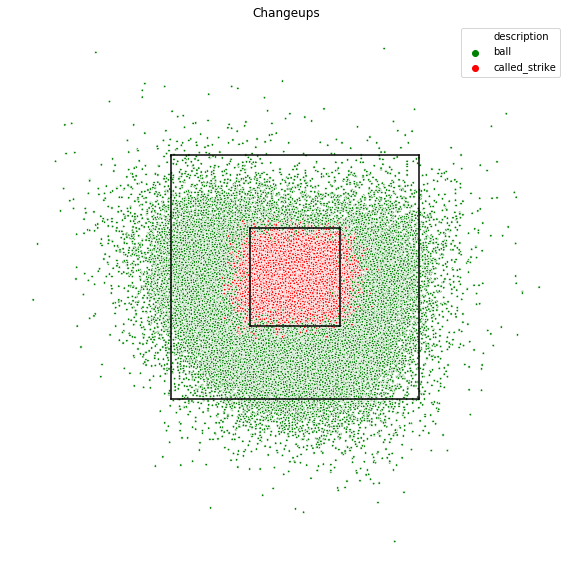

In [57]:
fig, ax = plt.subplots(figsize =(10,10))

plt.plot([-2,-2],[0,5], color="black")
plt.plot([2,2],[0,5], color="black")
plt.plot([-2,2],[0,0], color="black")
plt.plot([-2,2],[5,5], color="black")

plt.plot([-.725,-.725],[1.5,3.5], color="black")
plt.plot([.725,.725],[1.5,3.5], color="black")
plt.plot([-.725,.725],[1.5,1.5], color="black")
plt.plot([-.725,.725],[3.5,3.5], color="black")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

palette ={"ball": "green", "called_strike": "red"}

ax = sns.scatterplot(data=changeups, x='plate_x', y='plate_z', hue = 'description', s = 7, palette = palette)
ax.set_title('Changeups')

plt.show()

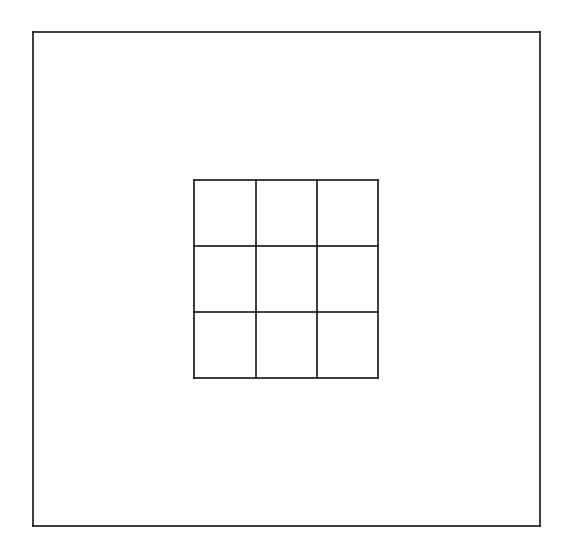

In [66]:
fig, ax = plt.subplots(figsize =(10,10))

plt.plot([-2,-2],[0,5], color="black")
plt.plot([2,2],[0,5], color="black")
plt.plot([-2,2],[0,0], color="black")
plt.plot([-2,2],[5,5], color="black")

plt.plot([-.725,-.725],[1.5,3.5], color="black")
plt.plot([.725,.725],[1.5,3.5], color="black")
plt.plot([-.725,.725],[1.5,1.5], color="black")
plt.plot([-.725,.725],[3.5,3.5], color="black")

plt.plot([-.241667,-.241667],[1.5,3.5], color="black")
plt.plot([.241667,.241667],[1.5,3.5], color="black")
plt.plot([-.725,.725],[2.166,2.166], color="black")
plt.plot([-.725,.725],[2.833,2.833], color="black")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

In [33]:
changeups[['plate_x', 'plate_z']].set_index('plate_x')

,plate_z
plate_x,
-0.87,-0.33
-1.86,0.95
0.76,3.04
1.88,3.47
-0.73,1.85
...,...
-0.43,0.75
0.31,0.51
-1.74,1.59


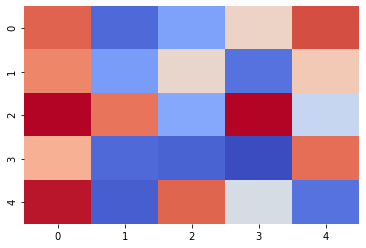

In [35]:
# create pitch grid, this is a quick and dirty example
pitch_matrix = np.random.rand(5,5)

# plot the matrix using seaborn.heatmap()
# of course its up to you to choose which parameters you want
# docs are here : https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(pitch_matrix, cbar=False, cmap="coolwarm")